In [43]:
import numpy as np
from matplotlib import pyplot as plt

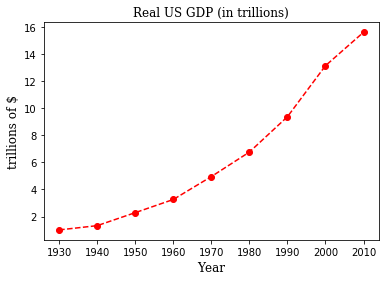

In [61]:
x = [1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]
y = [1.015, 1.33, 2.29, 3.26, 4.951, 6.759, 9.366, 13.131, 15.599]

style = {'family': 'serif',
        'color': 'black',
        'weight': 'normal',
        'size': 12}

plt.plot(x, y, '--ro')
plt.title('Real US GDP (in trillions)', fontdict=style)
plt.xlabel('Year', fontdict=style)
plt.ylabel('trillions of $', fontdict=style)
plt.show()

We approximate the relationship as linear. We use least squares estimation as a linear regression to use all the data points to find a best fit line that minimizes the square errors. We use the closed form solution $$x = (A^{t}A)^{-1}A^{t}b$$ where $x$ is the column vector containing the slope and the y-axis intercept, $A$ is the matrix of with first column year values and second column 1 as the coefficients of the $x$ unknowns, and $b$ is the column vector of y values as the results of the linear relationships.

In [45]:
A = np.array([[y, 1] for y in x])
b = np.array([[e] for e in y])

X = np.matmul(np.matmul(np.linalg.inv(np.matmul(A.transpose(), A)), A.transpose()), b)

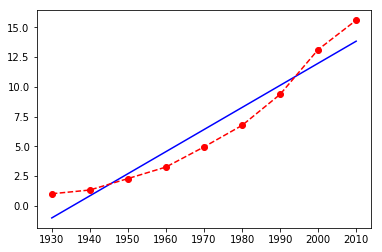

In [59]:
year = np.linspace(1930, 2010, 100)
rev = year*X[0][0] + X[1][0]
plt.plot(year,rev, 'b-', x, y, '--ro')
plt.show()

We note that the relationship is not necessarily linear. Literature suggests that the relationship of GDP to year is exponential. We then estimate the relationship, though a better fit may be found with the appropriate algorithm. This is a simple optimization problem similar to least squares, but with an exponential line fit rather than a linear one. Since there is no closed form solution, and iterative tools have yet to be introduced in the class, the relationship is estimated instead.

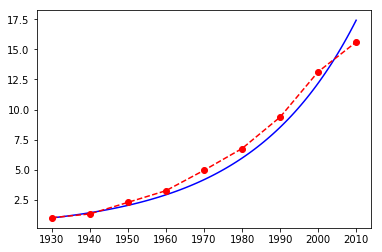

In [58]:
revE = np.exp((year - 1930)/28)
plt.plot(year,revE, 'b-', x, y, '--ro')
plt.show()